In [1]:
#Import necessary libraries. 
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
from torch.nn import init

In [2]:
#Use the Pytorch API to download the Fashion MNIST dataset. 
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True , download = True , transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train = False , download = True , transform = transforms.ToTensor ())

#Training and test loaders will be a list that help us visualise the dataset. 
training_loader = torch.utils.data.DataLoader(train_set , batch_size = 32, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_set , batch_size = 32, shuffle = False)

torch. manual_seed (0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [14]:
#Define a class for our implemented neural network. This class is a child the base class for all neural network modules
class Classifier(nn.Module):
  # Initialization of the internal structure of the neural network.
  def __init__(self):
    #Initialise the base constructor. 
    super(Classifier, self).__init__()
    
    #NEURAL NETWORK WITH ReLU ACTIVATION FUNTION.
    #First convolutional layer, with ReLU activation function and Max Pooling operation
    self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5), nn.ReLU(), nn.MaxPool2d(kernel_size=2))
    #Second convolutional layer, with ReLU activation function and Max Pooling operation
    self.cnn_model2 = nn.Sequential(nn.Conv2d(32,64, kernel_size=5), nn.ReLU(), nn.MaxPool2d(kernel_size=2))
    #Fully connected neural network, with ReLU activation function 
    self.fc_model = nn.Sequential(nn.Linear(1024,256), nn.ReLU(), nn.Linear(256, 10))
    
    #NEURAL NETWORK WITH ELU ACTIVATION FUNTION.
    #This would be first convolutional layer, with ELU activation function and Max Pooling operation
    #self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5), nn.ELU(), nn.MaxPool2d(kernel_size=2))
    #This would be second convolutional layer, with ELU activation function and Max Pooling operation
    #self.cnn_model2 = nn.Sequential(nn.Conv2d(32,64, kernel_size=5), nn.ELU(), nn.MaxPool2d(kernel_size=2))
    #This would be fully connected neural network, with ELU activation function
    #self.fc_model = nn.Sequential(nn.Linear(1024,256), nn.ELU(), nn.Linear(256, 10))
    
    #NEURAL NETWORK WITH TANH ACTIVATION FUNTION.
    #This would be first convolutional layer, with Tanh activation function and Max Pooling operation
    #self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5), nn.Tanh(), nn.MaxPool2d(kernel_size=2))
    #This would be second convolutional layer, with Tanh activation function and Max Pooling operation
    #self.cnn_model2 = nn.Sequential(nn.Conv2d(32,64, kernel_size=5), nn.Tanh(), nn.MaxPool2d(kernel_size=2))
    #This would be fully connected neural network, with Tanh activation function
    #self.fc_model = nn.Sequential(nn.Linear(1024,256), nn.Tanh(), nn.Linear(256, 10))
    
    
    #NEURAL NETWORK WITH SIGMOID ACTIVATION FUNTION.  
    #This would be first convolutional layer, with Sigmoid activation function and Max Pooling operation
    #self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32, kernel_size=5), nn.Sigmoid(), nn.MaxPool2d(kernel_size=2))
    #This would be second convolutional layer, with Sigmoid activation function and Max Pooling operation
    #self.cnn_model2 = nn.Sequential(nn.Conv2d(32,64, kernel_size=5), nn.Sigmoid(), nn.MaxPool2d(kernel_size=2))
    #This would be fully connected neural network, with Sigmoid activation function
    #self.fc_model = nn.Sequential(nn.Linear(1024,256), nn.Sigmoid(), nn.Linear(256, 10))

    #DROPOUT
    #self.fc_model = nn.Sequential(nn.Linear(1024,256), nn.ReLU(),nn.Dropout(0.3), nn.Linear(256, 10))
    
  def forward(self, x):
    #Since we have already defined the layers in the init function:
    #Pass the input through the first CNN layer 
    x = self.cnn_model1(x)
    #Then, the second CNN is applied
    x = self.cnn_model2(x)
    # Transform the tensor shape to fit into the perceptron
    x = x.reshape(x.size(0), -1)
    #Pass the results to the fully connected layer. 
    x = self.fc_model(x)
    return x

In [15]:
device = torch.device("cuda:0")

In [16]:
#Weights initialisation. 
def weights_init(layer):
  #Initialisation of the convolutional network using the xavier funtion.
  if isinstance(layer, nn.Conv2d):
    init.xavier_uniform_(layer.weight.data)
  #Initialisation of the fully connected network using the xavier funtion.  
  elif isinstance(layer, nn.Linear): 
    init.xavier_uniform_(layer.weight.data)
    init.uniform_(layer.bias.data) #iniliase the bias values of the fully connected network.


In [17]:
#Instantiate the mode
model = Classifier().to(device)
#Initialise the weights.
model.apply(weights_init)
#Define the loss function using CrossEntropyLoss() function. 
loss_function = nn.CrossEntropyLoss()

# SGD optimizer with learning rate of 0.1
opt = torch.optim.SGD(model.parameters(), lr=0.1)

# SGD optimizer with learning rate of 0.001
#opt = torch.optim.SGD(model.parameters(), lr=0.001)
# SGD optimizer with learning rate of 0.5
#opt = torch.optim.SGD(model.parameters(), lr=0.5)
# SGD optimizer with learning rate of 1
#opt = torch.optim.SGD(model.parameters(), lr=1)
# SGD optimizer with learning rate of 10
#opt = torch.optim.SGD(model.parameters(), lr=10)

In [18]:
#Model evaluation. The predicted value is compared to the ground truth label and accuracy is estimated.
def evaluation(dataloader): 
  model.eval()
  with torch.no_grad():    #Avoid weight change during the evaluation process. 
    correct=0
    total = 0
    for inputs, labels in dataloader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)   #Obtain the predicted value form the input data.
      _, predicted = torch.max(outputs.data, 1)  #The label that has the highest probability value at the end of the NN will be set to 1, the rest will be 0.
      total += labels.size(0)
      correct +=(predicted == labels).sum().item() #Compare if the predicted value corresponds to the real value. In that case add 1 to correct variable.
    
    return (correct/total)*100 #Estimate and return the accuracy. 

In [19]:
#Train the NN.
max_epochs =50 #Number of iterations.
loss_epoch_array = []
loss_epoch = 0
train_accuracy = []
test_accuracy = []

for epoch in range(max_epochs):
  loss_epoch = 0
  model.train()
  for i, (inputs, labels) in enumerate(training_loader):
    inputs=inputs.to(device)
    labels=labels.to(device)
    
    #Foward propagation.
    outputs= model(inputs)  #Predict the outputs 
    loss = loss_function(outputs, labels)  #Estimate the loss
    
    #Backpropagation and optimisation. 
    opt.zero_grad() #Required step before optimisation. All the gradients are set to 0
    loss.backward() #Backpropagation algorithm. 
    opt.step() #Updates the values of the weights.
    loss_epoch += loss.item()

  #Save the data.
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))


Epoch 1: loss: 882.3672239333391, train accuracy: 87.58333333333333, test accuracy:86.4
Epoch 2: loss: 602.4407160356641, train accuracy: 89.92333333333333, test accuracy:88.29
Epoch 3: loss: 516.6836453862488, train accuracy: 91.25999999999999, test accuracy:89.12
Epoch 4: loss: 456.90832681953907, train accuracy: 92.19500000000001, test accuracy:89.78
Epoch 5: loss: 407.08243184443563, train accuracy: 92.86, test accuracy:90.05
Epoch 6: loss: 362.1088013201952, train accuracy: 93.27666666666666, test accuracy:90.10000000000001
Epoch 7: loss: 319.2708987845108, train accuracy: 93.87, test accuracy:90.09
Epoch 8: loss: 278.82361547416076, train accuracy: 94.63166666666667, test accuracy:90.18
Epoch 9: loss: 243.84756403276697, train accuracy: 95.20833333333333, test accuracy:90.31
Epoch 10: loss: 215.78558257059194, train accuracy: 94.89666666666666, test accuracy:89.95
Epoch 11: loss: 202.05463198758662, train accuracy: 95.46166666666667, test accuracy:90.01
Epoch 12: loss: 195.429472

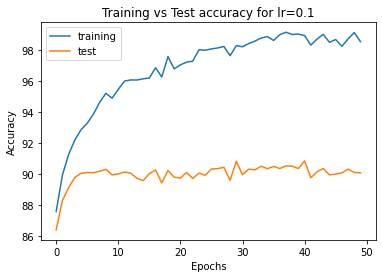

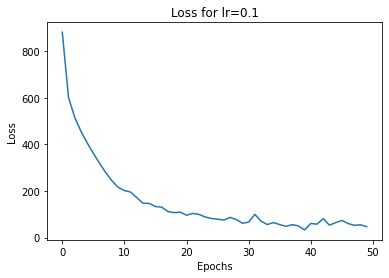

In [20]:
#Usedd to plot the results. 
import matplotlib.pyplot as plt
plt.plot(train_accuracy, label='training')
plt.plot(test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Test accuracy for lr=0.1')
plt.legend()
plt.show()

plt.plot(loss_epoch_array, label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for lr=0.1')
plt.show()